# Test Functions for Reliability Analysis

The table below listed the available test functions typically used
in the comparison of reliability analysis methods.

|                                        Name                                         | Spatial Dimension |           Constructor           |
|:-----------------------------------------------------------------------------------:|:-----------------:|:-------------------------------:|
|           {ref}`Cantilever Beam (2D) <test-functions:cantilever-beam-2d>`           |         2         |       `CantileverBeam2D `       |
|           {ref}`Circular Pipe Crack <test-functions:circular-pipe-crack>`           |         2         |      `CircularPipeCrack()`      |
|          {ref}`Convex Failure Domain <test-functions:convex-fail-domain>`           |         2         |      `ConvexFailDomain()`       |
| {ref}`Damped Oscillator Reliability <test-functions:damped-oscillator-reliability>` |         8         | `DampedOscillatorReliability()` |
|                   {ref}`Four-branch <test-functions:four-branch>`                   |         2         |         `FourBranch()`          |
|                    {ref}`Gayton Hat <test-functions:gayton-hat>`                    |         2         |          `GaytonHat()`          |
|               {ref}`Hyper-sphere Bound <test-functions:hyper-sphere>`               |         2         |         `HyperSphere()`         |
|              {ref}`RS - Circular Bar <test-functions:rs-circular-bar>`              |         2         |        `RSCircularBar()`        |
|                 {ref}`RS - Quadratic <test-functions:rs-quadratic>`                 |         2         |         `RSQuadratic()`         |
|           {ref}`Speed Reducer Shaft <test-functions:speed-reducer-shaft>`           |         5         |      `SpeedReducerShaft()`      |

In a Python terminal, you can list all the available functions relevant
for metamodeling applications using ``list_functions()`` and filter the results
using the ``tag`` parameter:

In [1]:
import uqtestfuns as uqtf

uqtf.list_functions(tag="reliability")

 No.            Constructor            Dimension   Description
-----  -----------------------------  -----------  -------------------------------------------------------------------------
  1         CantileverBeam2D()             2       Cantilever beam reliability problem from Rajashekhar and Ellington (1993)
  2         CircularPipeCrack()            2       Circular pipe under bending moment from Verma et al. (2015)
  3         ConvexFailDomain()             2       Convex failure domain problem from Borri and Speranzini (1997)
  4    DampedOscillatorReliability()       8       Performance function from Der Kiureghian and De Stefano (1990)
  5            FourBranch()                2       Series system reliability from Katsuki and Frangopol (1994)
  6             GaytonHat()                2       Two-Dimensional Gayton Hat function from Echard et al. (2013)
  7            HyperSphere()               2       Hyper-sphere bound reliability problem from Li et al. (2018)
  8         

## About reliability analysis

Consider a system whose performance is defined by a _performance function_[^lsf]
$g$ whose values, in turn, depend on:

- $\boldsymbol{x}_p$: the (uncertain) input variables of the underlying computational model $\mathcal{M}$
- $\boldsymbol{x}_s$: additional (uncertain) input variables that affects
  the performance of the system, but not part of inputs to $\mathcal{M}$ 
- $\boldsymbol{p}$: an additional set of _deterministic_ parameters of the system

Combining these variables and parameters as an input to the performance function $g$:

$$
g(\boldsymbol{x}; \boldsymbol{p}) = g(\mathcal{M}(\boldsymbol{x}_p), \boldsymbol{x}_s; \boldsymbol{p}).
$$

where $\boldsymbol{x} = \{ \boldsymbol{x}_p, \boldsymbol{x}_s \}$.

The system is said to be in _failure state_ if and only if $g(\boldsymbol{x}; \boldsymbol{p}) \leq 0$;
the set of all values $\{ \boldsymbol{x}, \boldsymbol{p} \}$ such that $g(\boldsymbol{x}; \boldsymbol{p}) \leq 0$
is called the _failure domain_.

Conversely, the system is said to be in _safe state_
if and only if $g(\boldsymbol{x}; \boldsymbol{p}) > 0$;
the set of all values $\{ \boldsymbol{x}, \boldsymbol{p} \}$
such that $g(\boldsymbol{x}; \boldsymbol{p}) > 0$
is called the _safe domain_.

```{note}
For example, taken in the context of nuclear engineering,
a performance function may be defined for the fuel cladding temperature.
The maximum temperature during a transient is computed using a computation model.
A hypothetical regulatory limit of the maximum temperature is provided
but with an uncertainty considering the variability in the high-temperature
performance within the cladding population.
The system is in failure state if the maximum temperature during a transient
as computed by the model exceeds the regulatory limit; vice versa,
the system is in safe state if the maximum temperature
does not exceed the regulatory limit.
```

_Reliability analysis_[^rare-event] concerns with estimating
the failure probability of a system with a given performance function $g$. 
For a given joint probability density function (PDF) $f_{\boldsymbol{X}}$
of the uncertain input variables $\boldsymbol{X} = \{ \boldsymbol{X}_p, \boldsymbol{X}_s \}$,
the failure probability $P_f$ of the system is defined as follows {cite}`Sudret2012, Verma2015`:

$$
P_f \equiv \mathbb{P}[g(\boldsymbol{X}; \boldsymbol{p}) \leq 0] = \int_{\{ \boldsymbol{x} | g(\boldsymbol{x}; \boldsymbol{p}) \leq 0 \}} f_{\boldsymbol{X}} (\boldsymbol{x}) \, \; d\boldsymbol{x}.
$$

Evaluating the above integral is, in general, non-trivial because the domain
of integration is only provided implicitly and the number of dimensions may
be large.

A series of plots below illustrates the reliability analysis problem
in two dimensions.
The left plot shows the limit-state surface
(i.e., $\boldsymbol{x}$ where $g(\boldsymbol{x}) = 0$) in the
input parameter space.
In the middle plot, $10^6$ sample points are randomly generated
and overlaid.
The red points (resp. blue points) indicate that the points fall in the 
failure domain (resp. safe domain).
Finally, the histogram on the right shows the failure probability, i.e.,
the area under the histogram such that $g(\boldsymbol{x}) \leq 0$.
The task of reliability analysis methods is to estimate the failure probability
accurately with as few function/model evaluations as possible.

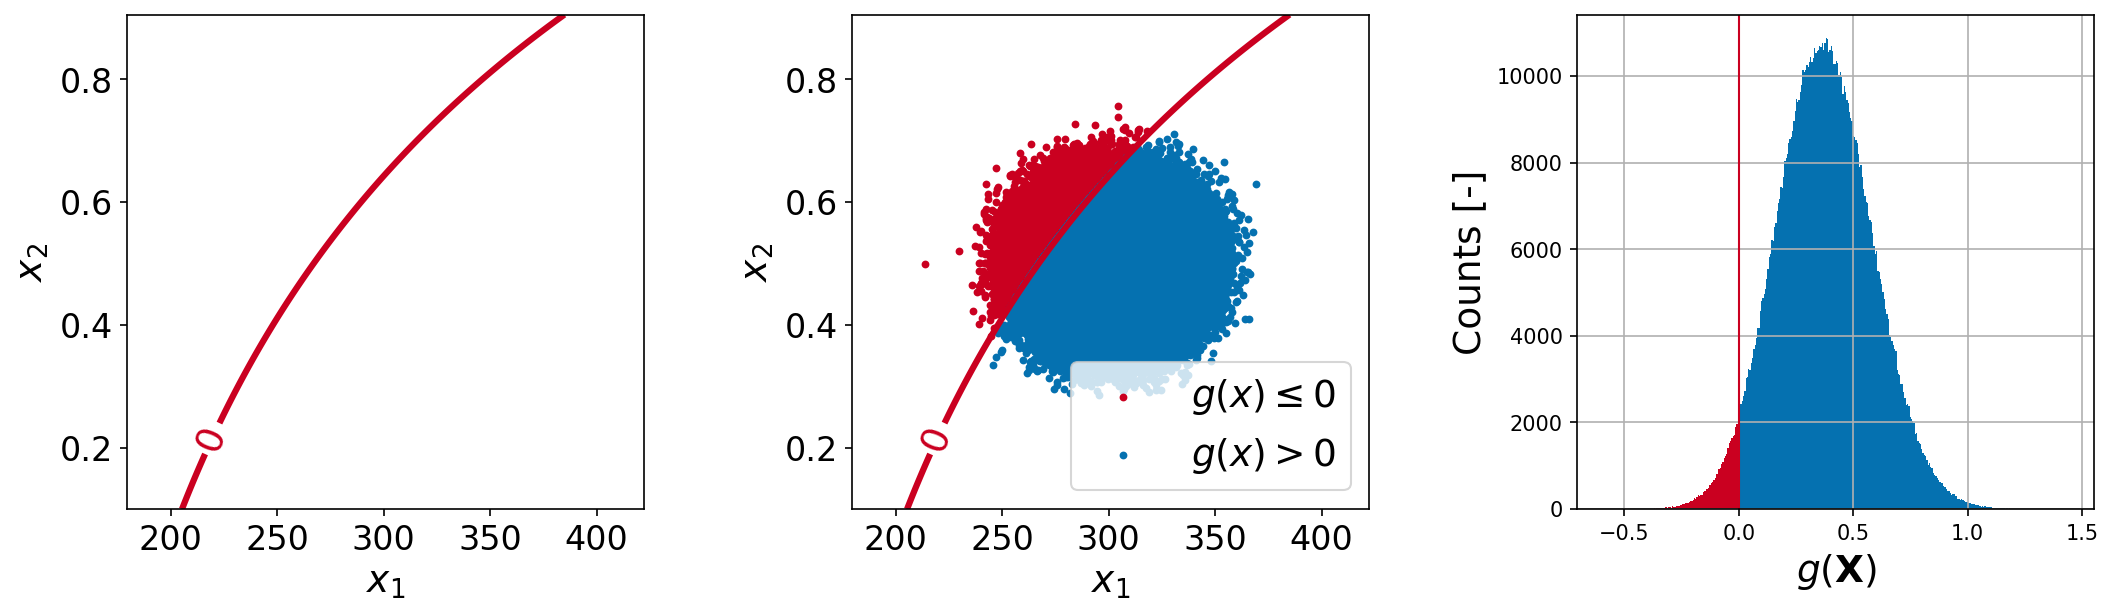

In [2]:
import numpy as np
import matplotlib.pyplot as plt

my_fun = uqtf.CircularPipeCrack()
my_fun.prob_input.reset_rng(237324)
xx = my_fun.prob_input.get_sample(1000000)
yy = my_fun(xx)
idx_neg = yy <= 0.0
idx_pos = yy > 0.0

lb_1 = my_fun.prob_input.marginals[0].lower
ub_1 = my_fun.prob_input.marginals[0].upper
lb_2 = my_fun.prob_input.marginals[1].lower
ub_2 = my_fun.prob_input.marginals[1].upper

# Create 2-dimensional grid
xx_1 = np.linspace(lb_1, ub_1, 1000)[:, np.newaxis]
xx_2 = np.linspace(lb_2, ub_2, 1000)[:, np.newaxis]
mesh_2d = np.meshgrid(xx_1, xx_2)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_fun(xx_2d)

# --- Create the plot
fig = plt.figure(figsize=(15, 5))

# Contour plot
axs_1 = plt.subplot(131)
cf = axs_1.contour(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    levels=0,
    colors=["#ca0020"],
    linewidths=[3.0],
)
axs_1.set_xlim([lb_1, ub_1])
axs_1.set_ylim([lb_2, ub_2])
axs_1.set_xlabel("$x_1$", fontsize=18)
axs_1.set_ylabel("$x_2$", fontsize=18)
axs_1.tick_params(labelsize=16)
axs_1.clabel(cf, inline=True, fontsize=18)

# Scatter plot
axs_2 = plt.subplot(132)
cf = axs_2.contour(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    levels=0,
    colors=["#ca0020"],
    linewidths=[3.0],
)
axs_2.scatter(
    xx[idx_neg, 0],
    xx[idx_neg, 1],
    color="#ca0020",
    marker=".",
    s=30,
    label="$g(x) \leq 0$"
)
axs_2.scatter(
    xx[idx_pos, 0],
    xx[idx_pos, 1],
    color="#0571b0",
    marker=".",
    s=30,
    label="$g(x) > 0$"
)
axs_2.set_xlim([lb_1, ub_1])
axs_2.set_ylim([lb_2, ub_2])
axs_2.set_xlabel("$x_1$", fontsize=18)
axs_2.set_ylabel("$x_2$", fontsize=18)
axs_2.tick_params(labelsize=16)
axs_2.clabel(cf, inline=True, fontsize=18)
axs_2.legend(fontsize=18, loc="lower right");

# Histogram
axs_3 = plt.subplot(133)
xx_test = my_fun.prob_input.get_sample(1000000)
yy_test = my_fun(xx_test)
idx_pos = yy_test > 0
idx_neg = yy_test <= 0

hist_pos = axs_3.hist(yy_test, bins="auto", color="#0571b0")
axs_3.hist(yy_test[idx_neg], bins=hist_pos[1], color="#ca0020")
axs_3.axvline(0, linewidth=1.0, color="#ca0020")

axs_3.grid()
axs_3.set_ylabel("Counts [-]", fontsize=18)
axs_3.set_xlabel("$g(\mathbf{X})$", fontsize=18)

plt.gcf().tight_layout(pad=4.0)
plt.gcf().set_dpi(150);

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^lsf]: also called _limit-state function_

[^rare-event]: also called rare-events estimation